# Motivational Example


reference: [chollet](https://github.com/fchollet/deep-learning-with-python-notebooks)

## Download Data

In [1]:
import numpy as np

In [2]:
import keras
keras.__version__

2024-05-15 17:02:52.933547: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


'2.15.0'

In [3]:
from keras.datasets import mnist

In [4]:
mnist.load_data?

Signature: mnist.load_data(path='mnist.npz')
Docstring:
Loads the MNIST dataset.

This is a dataset of 60,000 28x28 grayscale images of the 10 digits,
along with a test set of 10,000 images.
More info can be found at the
[MNIST homepage](http://yann.lecun.com/exdb/mnist/).

Args:
  path: path where to cache the dataset locally
    (relative to `~/.keras/datasets`).

Returns:
  Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.

**x_train**: uint8 NumPy array of grayscale image data with shapes
  `(60000, 28, 28)`, containing the training data. Pixel values range
  from 0 to 255.

**y_train**: uint8 NumPy array of digit labels (integers in range 0-9)
  with shape `(60000,)` for the training data.

**x_test**: uint8 NumPy array of grayscale image data with shapes
  (10000, 28, 28), containing the test data. Pixel values range
  from 0 to 255.

**y_test**: uint8 NumPy array of digit labels (integers in range 0-9)
  with shape `(10000,)` for the test data.

Example:

```python


https://keras.io/datasets/

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Explore Data

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
type(x_train)

numpy.ndarray

In [8]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
y_train.shape

(60000,)

In [10]:
y_train[0]

5

In [11]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [13]:
import matplotlib.pyplot as plt

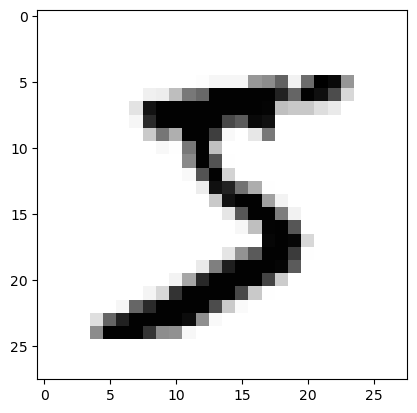

In [14]:
plt.imshow(x_train[0], cmap='Greys');

In [15]:
x_test.shape

(10000, 28, 28)

In [16]:
y_test.shape

(10000,)

In [17]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [18]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## NN Architecture

In [19]:
from keras import models
from keras import layers

https://keras.io/getting-started/sequential-model-guide/

In [20]:
model = models.Sequential()

In [21]:
layers.Dense?

Init signature:
layers.Dense(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs,
)
Docstring:     
Just your regular densely-connected NN layer.

`Dense` implements the operation:
`output = activation(dot(input, kernel) + bias)`
where `activation` is the element-wise activation function
passed as the `activation` argument, `kernel` is a weights matrix
created by the layer, and `bias` is a bias vector created by the layer
(only applicable if `use_bias` is `True`). These are all attributes of
`Dense`.

Note: If the input to the layer has a rank greater than 2, then `Dense`
computes the dot product between the `inputs` and the `kernel` along the
last axis of the `inputs` and axis 0 of the `kernel` (using `tf.tensordot`).
For example, if input has dimensions `(batch_s

In [22]:
model.add(layers.Dense(units=512,
                       activation='relu',
                       input_shape=(28 * 28,)))

In [23]:
model.add(layers.Dense(units=10,
                       activation='softmax'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
x_train_input = x_train.reshape((60000, 28 * 28))

In [26]:
x_train_input.dtype

dtype('uint8')

In [27]:
x_train_input.min()

0

In [28]:
x_train_input.max()

255

In [29]:
x_train_input = x_train_input.astype('float32') / 255

In [30]:
x_test_input = x_test.reshape((10000, 28 * 28))

In [31]:
x_test_input = x_test_input.astype('float32') / 255

compile model

In [32]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

one hot encode the target variable 

In [33]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model fitting

In [34]:
model.fit(x_train_input, y_train,
          epochs=10,
          batch_size=256)

Epoch 1/10
235/235 [==============================] - 2s 6ms/step - loss: 0.3247 - accuracy: 0.9083
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1396 - accuracy: 0.9596
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0936 - accuracy: 0.9729
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0707 - accuracy: 0.9792
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0539 - accuracy: 0.9842
Epoch 6/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0425 - accuracy: 0.9880
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0337 - accuracy: 0.9904
Epoch 8/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0271 - accuracy: 0.9924
Epoch 9/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0218 - accuracy: 0.9946
Epoch 10/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0176 - accuracy: 0.9956

test the model on test set or predict

In [35]:
eval_loss, eval_acc = model.evaluate(x_test_input, 
                                     y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0615 - accuracy: 0.9812


In [36]:
print('Test accuracy: {}'.format(eval_acc))

Test accuracy: 0.9811999797821045


# Tensor Operations Example

Element-wise operations

Broadcasting

Dot product

Reshaping


### Element-wise operations

In [37]:
x1 = np.array([2, -1, 4])
x2 = np.array([1, 2, 3])

In [38]:
x1 + x2    # element-wise operations

array([3, 1, 7])

In [39]:
np.maximum(x1, 0)    # element-wise operations

array([2, 0, 4])

### Broadcasting

Smaller tensor will be broadcasted to match the shape of the larger tensor

In [40]:
x1 + 2    # broadcasting scalar (2) to vector (x1)

array([4, 1, 6])

In [41]:
x3 = np.array([[1, 1], [2, 2]])
x3

array([[1, 1],
       [2, 2]])

In [42]:
x3 + 2

array([[3, 3],
       [4, 4]])

In [43]:
x4 = np.array([-1, -1])
x4

array([-1, -1])

In [44]:
x3 + x4    # broadcasting vector (x3) to matrix (x4)

array([[0, 0],
       [1, 1]])

### dot product

In [45]:
x1

array([ 2, -1,  4])

In [46]:
np.dot(x1, x1)

21

In [47]:
np.dot(x1, x1.T)

21

In [48]:
x3

array([[1, 1],
       [2, 2]])

In [49]:
x4

array([-1, -1])

In [50]:
np.dot(x3, x4.T)

array([-2, -4])

In [51]:
np.dot(x3, x4)

array([-2, -4])

In [52]:
x5 = np.array([[1, 1], [2, 2], [4, 5]])
x6 = np.array([[1, 2, 3], [3, 1, 2]])

In [53]:
x5.shape

(3, 2)

In [54]:
x6.shape

(2, 3)

In [55]:
np.dot(x5, x6)

array([[ 4,  3,  5],
       [ 8,  6, 10],
       [19, 13, 22]])

In [56]:
np.dot(x5, x6.T)

ValueError: shapes (3,2) and (3,2) not aligned: 2 (dim 1) != 3 (dim 0)

### Reshaping

In [ ]:
x3

In [57]:
print(x3.reshape(-1, 1))
print(x3.reshape(-1, 1).shape)

[[1]
 [1]
 [2]
 [2]]
(4, 1)


In [58]:
print(x3.reshape(1, -1))
print(x3.reshape(1, -1).shape)

[[1 1 2 2]]
(1, 4)


In [59]:
print(x3.reshape(1, 4))
print(x3.reshape(1, 4).shape)

[[1 1 2 2]]
(1, 4)


In [60]:
print(x3.reshape(4,))
print(x3.reshape(4,).shape)

[1 1 2 2]
(4,)


In [61]:
print(x3.ravel())
print(x3.ravel().shape)

[1 1 2 2]
(4,)


In [62]:
x3

array([[1, 1],
       [2, 2]])

In [63]:
x3.ndim

2

In [64]:
x3.shape

(2, 2)

In [65]:
x3.dtype

dtype('int64')

# SGD

$$y = wx + b$$



In [66]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [67]:
x = np.round(np.arange(-4, 4.1, 0.1), 1)
y = x >0    # we ignore the bias term for now

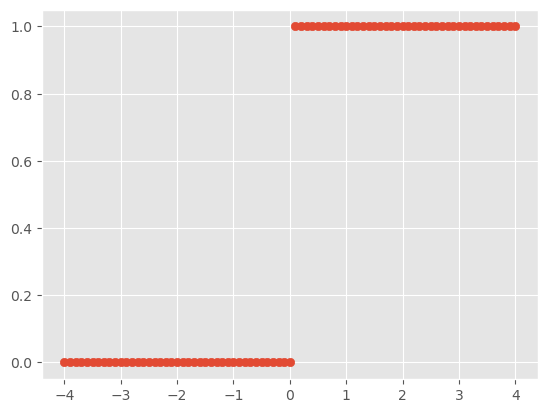

In [68]:
plt.scatter(x, y);

Let's assumed x and y values are fixed. We are trying to find the gradient of y relative to w.

We try three values of w:
- 0.99, 1.0, 1.01

In [69]:
idx = np.where(x == 1)

In [70]:
x[idx]

array([1.])

In [71]:
y[idx]

array([ True])

In [72]:
def delta(obj):
    return 1 / (1 + np.exp(-obj))

In [73]:
w = 1
lr = 0.1

In [74]:
def training_loop(w, idx, lr, x, y):
    for i in range(100):
        y_pred = delta(x[idx] * w)
        #print("y prediction", y_pred)
        error = (y[idx] - y_pred) * (1 - y_pred) * (y_pred)
        #print("error prediction", error)
        w = w + lr * (error * w)
        #print("w", w, "\n")
        print("{}{}{}".format(y_pred, error, w))

In [75]:
training_loop(w, idx, lr, x, y)

[0.73105858][0.05287709][1.00528771]
[0.73209693][0.0525441][1.0105699]
[0.73313167][0.05221269][1.01584636]
[0.73416273][0.05188288][1.02111686]
[0.73519009][0.05155468][1.0263812]
[0.73621371][0.05122811][1.03163916]
[0.73723356][0.05090318][1.03689053]
[0.73824959][0.0505799][1.04213511]
[0.73926177][0.05025829][1.0473727]
[0.74027007][0.04993835][1.05260311]
[0.74127445][0.0496201][1.05782614]
[0.7422749][0.04930355][1.06304159]
[0.74327137][0.04898871][1.0682493]
[0.74426384][0.04867559][1.07344906]
[0.74525228][0.04836419][1.07864071]
[0.74623666][0.04805453][1.08382407]
[0.74721697][0.04774661][1.08899896]
[0.74819317][0.04744044][1.09416522]
[0.74916525][0.04713603][1.09932268]
[0.75013318][0.04683339][1.10447118]
[0.75109693][0.04653251][1.10961057]
[0.7520565][0.04623341][1.11474067]
[0.75301186][0.04593609][1.11986136]
[0.753963][0.04564055][1.12497247]
[0.75490989][0.0453468][1.13007386]
[0.75585253][0.04505485][1.13516539]
[0.75679089][0.04476469][1.14024692]
[0.75772497][

***